In [3]:
import pandas as pd

In [4]:
data=pd.read_excel('Problem_C_Data_Wordle.xlsx')
data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3


In [5]:
data.shape

(359, 12)

In [6]:
data.columns

Index(['Date', 'Contest number', 'Word', 'Number of  reported results',
       'Number in hard mode', '1 try', '2 tries', '3 tries', '4 tries',
       '5 tries', '6 tries', '7 or more tries (X)'],
      dtype='object')

In [7]:
data.sort_values(by='Date',inplace=True)
data.reset_index(inplace=True,drop=True)
data['rolling10']=data['Number of  reported results'].rolling(10).mean()

aa=[]
for i in range(data.shape[0]):
    if i%10==1:
        aa.append(1)
    else:
        aa.append(0)
    
data['aa']=aa
data=data[data['aa']==1]
data.dropna(inplace=True)
data.sort_values(by='Date')
data.reset_index(inplace=True,drop=True)

data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),rolling10,aa
0,2022-01-18,213,proxy,220950,6206,1,2,11,24,31,26,6,165092.3,1
1,2022-01-28,223,perky,296968,11148,1,4,17,30,27,17,4,277533.3,1
2,2022-02-07,233,elder,288228,13340,1,3,13,24,30,24,5,329959.1,1
3,2022-02-17,243,shake,342003,12767,1,6,16,23,24,21,9,295370.1,1
4,2022-02-27,253,chant,250413,10438,1,9,33,33,16,7,1,268889.1,1
5,2022-03-09,263,month,201799,9435,1,5,26,37,22,8,1,226864.0,1
6,2022-03-19,273,allow,156311,8515,0,5,21,32,26,14,3,191804.7,1
7,2022-03-29,283,shall,149070,8494,0,3,17,30,28,17,4,160257.3,1
8,2022-04-08,293,scare,141158,9010,1,12,23,26,21,13,4,134539.9,1
9,2022-04-18,303,flair,112383,7341,1,8,30,36,18,6,1,117893.1,1


In [8]:
data.to_excel('rolling10.xlsx')

In [9]:
import sys
!{sys.executable} -m  pip install --upgrade pip
!{sys.executable} -m pip install tensorflow  -i https://pypi.tuna.tsinghua.edu.cn/simple
!{sys.executable} -m pip install keras 


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [10]:

import pandas as pd
import warnings 
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential, load_model


In [11]:



dataset=data['rolling10']

# 将整型变为float
dataset = dataset.astype('float32')
def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1, 1))

 
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)


#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(dataset,look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions



Epoch 1/100
34/34 - 1s - loss: 0.0686 - 714ms/epoch - 21ms/step
Epoch 2/100
34/34 - 0s - loss: 0.0579 - 26ms/epoch - 762us/step
Epoch 3/100
34/34 - 0s - loss: 0.0498 - 23ms/epoch - 674us/step
Epoch 4/100
34/34 - 0s - loss: 0.0440 - 22ms/epoch - 645us/step
Epoch 5/100
34/34 - 0s - loss: 0.0402 - 21ms/epoch - 616us/step
Epoch 6/100
34/34 - 0s - loss: 0.0375 - 22ms/epoch - 645us/step
Epoch 7/100
34/34 - 0s - loss: 0.0348 - 22ms/epoch - 645us/step
Epoch 8/100
34/34 - 0s - loss: 0.0326 - 26ms/epoch - 762us/step
Epoch 9/100
34/34 - 0s - loss: 0.0303 - 21ms/epoch - 616us/step
Epoch 10/100
34/34 - 0s - loss: 0.0285 - 25ms/epoch - 733us/step
Epoch 11/100
34/34 - 0s - loss: 0.0266 - 20ms/epoch - 586us/step
Epoch 12/100
34/34 - 0s - loss: 0.0252 - 21ms/epoch - 616us/step
Epoch 13/100
34/34 - 0s - loss: 0.0233 - 19ms/epoch - 557us/step
Epoch 14/100
34/34 - 0s - loss: 0.0217 - 20ms/epoch - 586us/step
Epoch 15/100
34/34 - 0s - loss: 0.0203 - 24ms/epoch - 704us/step
Epoch 16/100
34/34 - 0s - loss: 0.

In [12]:

#模型验证
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)

#反归一化
trainPredict_ = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform(trainY)




2/2 [==============================] - 0s 2ms/step


MAPE :
7.549988478422165
RMSE :
25268.434
MAE :
10721.586


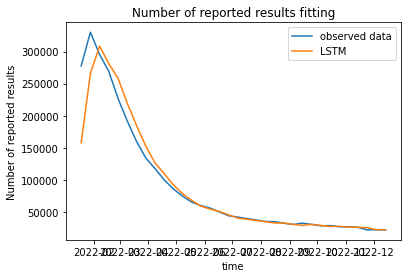

In [89]:

from sklearn.metrics import mean_squared_error,mean_absolute_error

def score(y_true, y_pre):
    # MAPE
    print("MAPE :")
    print(mean_absolute_percentage_error(y_true, y_pre)) 
    # RMSE
    print("RMSE :")
    print(np.sqrt(mean_squared_error(y_true, y_pre))) 
    # MAE
    print("MAE :")
    print(mean_absolute_error(y_true, y_pre)) 
#     # R2
#     print("R2 :")
#     print(np.abs(r2_score(y_true,y_pre)))

score(trainPredict_,trainY_)

plt.plot(data['Date'].values[:-1],trainY_, label='observed data')
plt.plot(data['Date'].values[:-1],trainPredict_, label='LSTM')
plt.xlabel( 'time')
plt.ylabel( 'Number of reported results')
plt.title( 'Number of reported results fitting')
plt.legend()
plt.savefig('./Q1/Number of reported results fitting.jpg') 
plt.show()

In [109]:

x_input=trainY[-1]
predict_forword_number=7
predict_list=[]
predict_list.append(x_input)
while len(predict_list) < predict_forword_number:
    x_input = predict_list[-1].reshape((-1, 1, 1))
    yhat = model.predict(x_input, verbose=0)
    #预测新值
    predict_list.append(yhat)
    #取出    
    
scaler.inverse_transform(np.array([ i.reshape(-1,1)[:,0].tolist() for i in predict_list]))

array([[22456.59902252],
       [22697.39872528],
       [22887.03305904],
       [23036.51291658],
       [23154.42523636],
       [23247.4885875 ],
       [23320.97358149]])

In [13]:
data1=pd.read_excel('版本1_时序数据滑窗转换_rolling10.xlsx')
data1.head()

,Q1-时序变量转换_Y,Q2-时序变量转换_X1,Q3-Unnamed: 0,Q4-Date,Q5-Contest number,Q6-Word,Q7-Number of reported results,Q8-Number in hard mode,Q9-1 try,Q10-2 tries,Q11-3 tries,Q12-4 tries,Q13-5 tries,Q14-6 tries,Q15-7 or more tries (X),Q16-rolling10,Q17-aa
0,NaN,NaN,0.0,2022-01-18,213.0,proxy,220950.0,6206.0,1.0,2.0,11.0,24.0,31.0,26.0,6.0,165092.3,1.0
1,277533.3,165092.3,1.0,2022-01-28,223.0,perky,296968.0,11148.0,1.0,4.0,17.0,30.0,27.0,17.0,4.0,277533.3,1.0
2,329959.1,277533.3,2.0,2022-02-07,233.0,elder,288228.0,13340.0,1.0,3.0,13.0,24.0,30.0,24.0,5.0,329959.1,1.0
3,295370.1,329959.1,3.0,2022-02-17,243.0,shake,342003.0,12767.0,1.0,6.0,16.0,23.0,24.0,21.0,9.0,295370.1,1.0
4,268889.1,295370.1,4.0,2022-02-27,253.0,chant,250413.0,10438.0,1.0,9.0,33.0,33.0,16.0,7.0,1.0,268889.1,1.0


In [14]:
temppp=data1[['Q1-时序变量转换_Y', 'Q2-时序变量转换_X1','Q4-Date']]

In [16]:
temppp.dropna(inplace=True)
temppp.reset_index(inplace=True,drop=True)

In [168]:
import sys
!{sys.executable} -m pip install sklearn -i https://pypi.tuna.tsinghua.edu.cn/simple
!{sys.executable} -m pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple
!{sys.executable} -m pip install lightgbm -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [20]:
# 此处所引入的包大部分为下文机器学习算法
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import xgboost as xgb
import lightgbm as lgb
import numpy as np


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 


tr_x,te_x,tr_y,te_y=train_test_split(temppp[['Q2-时序变量转换_X1']].values.reshape(-1, 1) ,temppp['Q1-时序变量转换_Y'].values.reshape(-1, 1),test_size=0.1,random_state=5)


model=MLPRegressor(hidden_layer_sizes=10,max_iter=1000).fit(tr_x,tr_y)

y_pred=model.predict(te_x)
print("神经网络:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(model.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))


神经网络:
训练集平均绝对百分比误差:1.420
测试集平均绝对百分比误差:1.628
平均绝对误差: 4848.974338324283
r2_score 0.9927600168838743


In [22]:


print("\n线性回归:")
logreg = LinearRegression()
logreg.fit(tr_x, tr_y)
y_pred = logreg.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))
      
print("\n决策树回归:")
tree=DecisionTreeRegressor(max_depth=50,random_state=0)
tree.fit(tr_x,tr_y)
y_pred = tree.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))
      
      
print("\n随机森林回归:")
rf=RandomForestRegressor(max_depth=20,n_estimators=1000,random_state=0)
rf.fit(tr_x,tr_y)

y_pred = rf.predict(te_x)

print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))
      

print("\nLGBM回归:")
lgb_model=lgb.LGBMRegressor()
lgb_model.fit(tr_x,tr_y)
y_pred = lgb_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))


print("\nXGBOOST回归:")
xgb_model=xgb.XGBRegressor()
xgb_model.fit(tr_x,tr_y)
y_pred = xgb_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))


线性回归:
训练集平均绝对百分比误差:0.094
测试集平均绝对百分比误差:0.040
平均绝对误差: 4984.018719694574
r2_score 0.9930590683807086

决策树回归:
训练集平均绝对百分比误差:1.448
测试集平均绝对百分比误差:1.634
平均绝对误差: 16659.275
r2_score 0.909809165125508

随机森林回归:
训练集平均绝对百分比误差:1.441
测试集平均绝对百分比误差:1.656
平均绝对误差: 8401.022374999606
r2_score 0.9768312796594524

LGBM回归:
训练集平均绝对百分比误差:0.761
测试集平均绝对百分比误差:0.965
平均绝对误差: 86688.3767578125
r2_score -0.0007673786306794383

XGBOOST回归:
训练集平均绝对百分比误差:1.448
测试集平均绝对百分比误差:1.634
平均绝对误差: 16659.333886718756
r2_score 0.9098114636065793


In [167]:
#model 神经网络
#logreg：线性回归
#tree：决策树
#rf：随机森林
#lgb_model：LGBM
#xgb_model：XGBoost
predict_forword_number=7
predict_list=[]
predict_list.append(x_input)
while len(predict_list) < predict_forword_number:
    x_input = predict_list[-1]
    yhat = xgb_model.predict(x_input)
    #预测新值
    predict_list.append(yhat)
    #取出    
predict_list

[array([56291.8]),
 array([50229.574], dtype=float32),
 array([44463.3], dtype=float32),
 array([42355.01], dtype=float32),
 array([42355.01], dtype=float32),
 array([42355.01], dtype=float32),
 array([42355.01], dtype=float32)]

In [91]:
data=pd.read_excel('Problem_C_Data_Wordle.xlsx')
data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3


In [95]:
data['len']=data['Word'].apply(lambda x:len(x))

In [96]:
aa='a、b、c、d、e、f、g、h、i、j、k、l、m、n、o、p、q、r、s、t、u、v、w、x、y、z'.split('、')

In [97]:
from collections import Counter
Counter('maanly')

Counter({'m': 1, 'a': 2, 'n': 1, 'l': 1, 'y': 1})

In [98]:
Counter('maanly')['a']

2

In [99]:
temp=[]
for i in data['Word']:
    tt=Counter(i.strip())
    bb=[0]*26
    for j in tt:
        bb[aa.index(j)]=tt[j]
    temp.append(bb)

In [100]:
temp=pd.DataFrame(temp,columns=aa)
temp

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
355,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
356,0,0,0,0,1,0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
357,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [101]:
newdata=pd.concat([data,temp],axis=1)
newdata

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,q,r,s,t,u,v,w,x,y,z
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,...,0,0,0,0,0,0,0,0,1,0
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,0,1,0,0,0,0,0,0,0,0
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,0,0,0,0,0,1,0,0,0,0
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,0,0,0,0,0,0,0,0,0,0
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,0,1,0,0,0,0,0,0,0,0
355,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,1,1,0,0,1,0,0,0,1,0
356,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,0,1,0,0,0,0,0,0,0,0
357,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,0,1,0,0,0,0,0,0,0,0


In [102]:
newdata.columns

Index(['Date', 'Contest number', 'Word', 'Number of  reported results',
       'Number in hard mode', '1 try', '2 tries', '3 tries', '4 tries',
       '5 tries', '6 tries', '7 or more tries (X)', 'len', 'a', 'b', 'c', 'd',
       'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
       's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
      dtype='object')

In [103]:
newdata['hard pecent']=newdata['Number in hard mode']/newdata['Number of  reported results']

In [104]:
X=newdata[aa+['len']]
y=newdata['hard pecent']

In [106]:
import numpy as np
import statsmodels.api as sm


X = sm.add_constant(X)
ols = sm.OLS(y,X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            hard pecent   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9177
Date:                Fri, 17 Feb 2023   Prob (F-statistic):              0.587
Time:                        09:21:41   Log-Likelihood:                 575.34
No. Observations:                 359   AIC:                            -1095.
Df Residuals:                     331   BIC:                            -985.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.150      0.223      0.8

In [108]:
newdata.to_excel('newdata.xlsx')